In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 




from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# code to produce the summary data (.csv file) lives here: 
# /Users/floorbroekgaarden/Projects/GitHub/BlackHole-NeutronStar/otherCode/WriteRatesToCSV_EM.py

### the following block of code just creates list for the SFRD model names as they occur in the csv files 

In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
        


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [3]:
def plotRatesMSSFRandModelsAnalysisFormationChannelsCombined(whichRate='intrinsic', DCOtypeWanted='BHNS', whichChannel='classic', ylims=[0,1], CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'):
    
    """
    whichChannel choose from   ['All', 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']
    """
    
    
    ncols=1
    nrows=1
    # 20, 12
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,7), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    
    colorlist = ['k', '#118AB2', '#EF476F', '#FFD166', '#073B4C', 'gray']
    
    List_formationchannelOptions = ['All', 'classic', \
                      'stable B no CEE', \
                    'immediate CE',\
                 r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    
    
    for ind_t, DCOtype in enumerate(Types):
        # only plot BHNS in this case 
        if DCOtype==DCOtypeWanted:
            for ind_c, whichChannel in enumerate(['classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        
                for ind_L, MSSFRname in enumerate(MSSFRnameslist):



                    stringgg = 'AllDCOsimulation_formation_channels'
                    df_name = CSVdir + '/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                    df = pd.read_csv(df_name, index_col=0).T
                    rates_L = df[MSSFRnameslistCSV[ind_L]]


                    if whichRate =='intrinsic':
                        ind_wanted = dictFormationChannelIndex[whichChannel]*2
                        rates = rates_L[ind_wanted::12][0:nModels]
                        totalrates = rates_L[0::12][0:nModels]
                        if ind_L==0:
                            print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                        ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'







                    elif whichRate=='observed':
                        ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                        rates = rates_L[ind_wanted::12][0:nModels]

                        totalrates = rates_L[1::12][0:nModels]
                        if ind_L==0:
                            print('the observed fiducial rate for channel %s is '%whichChannel, DCOtype ,'=',rates[0]) 
                        ylabel = r' $\rm{f}_{\rm{X}}$'



                    # line properties for highlighted SFRD models
                    if MSSFRname=='000':
                        zorder = 100
                        label=MSSFRnameslist[ind_L]
                        ls = MSSFRlinestyles[0]
                        ALPHA=1
                    elif MSSFRname=='231':
                        zorder=10
                        label=MSSFRnameslist[ind_L] 
                        ls = MSSFRlinestyles[1]
                        ALPHA=1
                    elif MSSFRname=='312':
                        zorder=10
                        label=MSSFRnameslist[ind_L]
                        ls = MSSFRlinestyles[2]
                        ALPHA=1
                    else:
                        zorder=2
                        label=None    
                        ls = MSSFRlinestyles[0]
                        ALPHA=0.1


                    ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                    ind_color = dictFormationChannelIndex[whichChannel]
                    axe.plot(range(len(rates)), ratesRatio, c=colorlist[ind_color], lw=3, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                    axe.scatter(range(len(rates)), ratesRatio, c=colorlist[ind_color], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors

                    # plot fiducial result with a star
                    if ind_L==0:
                        axe.scatter(range(len(rates))[0], ratesRatio[0],\
                                           c=colorlist[ind_color], s=200, label=None, \
                                           zorder=1000, marker='*', edgecolor='black')


            xmin = -0.8
            xmax = nModels -0.5 
            xx = np.linspace(xmin,xmax,15)

            if whichRate=='intrinsic':
                min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
                max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
                axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.2, color='gray', zorder=0)

                # for BHNS plot that its a upper limit
                if ind_t==1:
                    axe.scatter(xx, max_obs_rate, marker=11, color='gray', zorder=0, s=45)

            else:
                for ll in [0.25, 0.5, 0.75]:
                    axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
                    axe.text(xmax-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
                axe.set_ylim(ylims[0], ylims[1] )
                


            # make up axes
            if ind_t ==1:
                xlabel = r'\textbf{binary population synthesis model} $\mu$'
            else:
                xlabel=r'  $\_$ '

            axe.set_xlim(xmin, xmax)
            axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)

    
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[0], ylims[1])
            ind_label = dictFormationChannelIndex[whichChannel]-1
            if DCOtypeWanted!='BHNS':
                axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')

    
            ##### SECOND AXIS ######
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))

            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)  
            

    # plot legend of formation channels 
    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=5, color=colorlist[ind_c+1], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,\
                         bbox_to_anchor=(.85, 1.15)) 

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.34, hspace=0.16)
    plt.savefig('./Rates_' + whichRate + '_ '+ DCOtypeWanted + '_'+ 'formationChannels' + '.png', dpi=600, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.savefig('./Rates_' + whichRate + '_ '+ DCOtypeWanted + '_'+ 'formationChannels' + '.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')

    plt.show()
    plt.close()

    return




# Plot figure 11

the observed fiducial rate for channel classic is  BHNS = 9.259222650794662
the observed fiducial rate for channel stable B no CEE is  BHNS = 0.4572727304372974
the observed fiducial rate for channel immediate CE is  BHNS = 0.4652596603728062
the observed fiducial rate for channel double-core CE is  BHNS = 0.03526468822924006
the observed fiducial rate for channel other is  BHNS = 0.6105757961211099


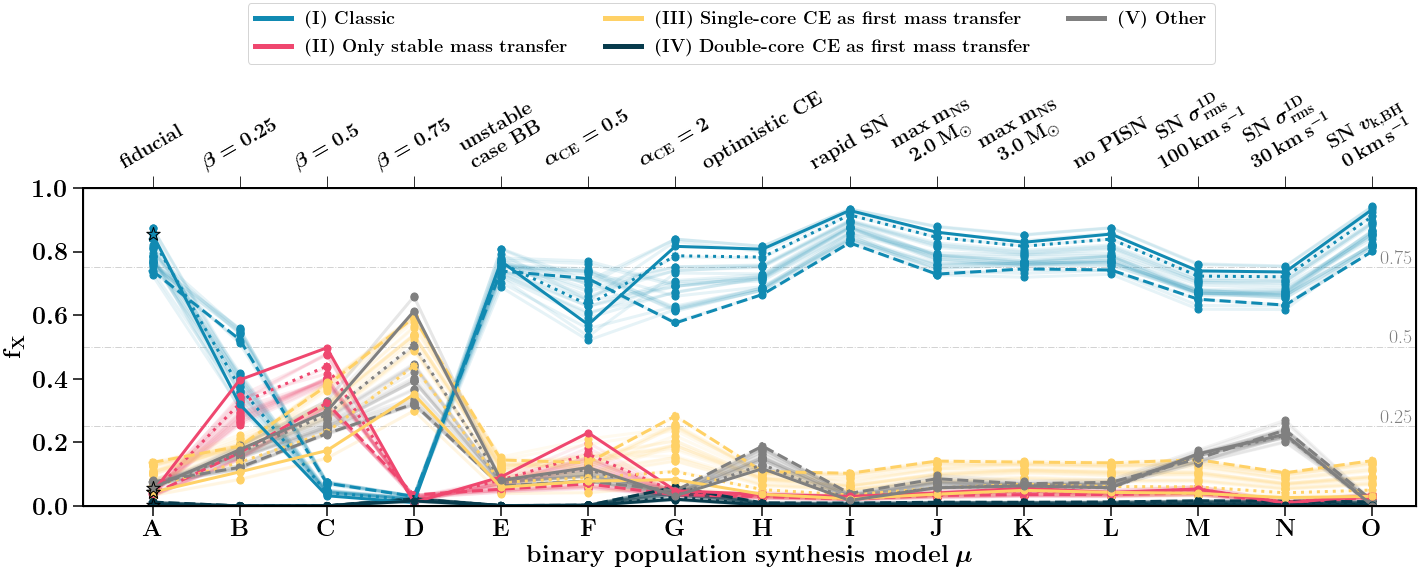

In [4]:

CSVdir = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
ylims =[0,1]
plotRatesMSSFRandModelsAnalysisFormationChannelsCombined(whichRate='observed', DCOtypeWanted='BHNS', whichChannel='classic', ylims=ylims, CSVdir=CSVdir)


# make table 5, calculate the minimum and maxim values over all models

In [11]:
def calculateTable5values(whichRate='intrinsic', DCOtypeWanted='BHNS', CSVdir='/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'):
    
    """
    whichChannel choose from   ['All', 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']
    """
    
    

    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    
   
    
    List_formationchannelOptions = ['All', 'classic', \
                      'stable B no CEE', \
                    'immediate CE',\
                 r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    
    
    for ind_t, DCOtype in enumerate(Types):
        # only plot BHNS in this case 
        if DCOtype==DCOtypeWanted:
            for ind_c, whichChannel in enumerate(['classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
                min_c, max_c = 1,0 
                for ind_L, MSSFRname in enumerate(MSSFRnameslist):



                    stringgg = 'AllDCOsimulation_formation_channels'
                    df_name = CSVdir + '/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                    df = pd.read_csv(df_name, index_col=0).T
                    rates_L = df[MSSFRnameslistCSV[ind_L]]


                    if whichRate =='intrinsic':
                        ind_wanted = dictFormationChannelIndex[whichChannel]*2
                        rates = rates_L[ind_wanted::12][0:nModels]
                        totalrates = rates_L[0::12][0:nModels]
                        if ind_L==0:
                            print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 




                    elif whichRate=='observed':
                        ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                        rates = rates_L[ind_wanted::12][0:nModels]

                        totalrates = rates_L[1::12][0:nModels]
                        if ind_L==0:
                            print('the observed fiducial rate for channel %s is '%whichChannel, DCOtype ,'=',rates[0]) 




                    ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                    
                    temp_ = np.concatenate(([min_c], ratesRatio))
                    min_c = min(temp_)
                    temp_ = np.concatenate(([max_c], ratesRatio))
                    max_c = max(temp_)
                    
                print(whichChannel, '[min,max]=', min_c, max_c)
                print()

    return




In [12]:

CSVdir = '/Users/floorbroekgaarden/Projects/BlackHole-NeutronStar/csvFiles'
calculateTable5values(whichRate='observed', DCOtypeWanted='BHNS',  CSVdir=CSVdir)


the observed fiducial rate for channel classic is  BHNS = 9.259222650794662
classic [min,max]= 0.010254676620725881 0.9426254252239841

the observed fiducial rate for channel stable B no CEE is  BHNS = 0.4572727304372974
stable B no CEE [min,max]= 0.007646262843310794 0.49723626370737284

the observed fiducial rate for channel immediate CE is  BHNS = 0.4652596603728062
immediate CE [min,max]= 0.02068118342831625 0.5974494806471049

the observed fiducial rate for channel double-core CE is  BHNS = 0.03526468822924006
double-core CE [min,max]= 0.0 0.05892691438456022

the observed fiducial rate for channel other is  BHNS = 0.6105757961211099
other [min,max]= 0.00028362257185685313 0.6587299054962288

